# Predicting Exoplanet Candidates with Machine Learning

In this project, we aim to build a Machine Learning model to predict whether a candidate is a confirmed exoplanet or not. We will use publicly available data to create a classification model that can automate the process of identifying confirmed planets. This document will serve as a guide through the entire workflow, starting from data exploration and preparation to model building and evaluation.

The data used in this project can be found at the following link:

[Dataset Link](https://drive.google.com/file/d/1Ui9lIx8LeKaV6UuXT5VNbyz6XplGO2N5/view)

The dataset contains public information about exoplanets provided by the California Institute of Technology (CalTech) and the National Aeronautics and Space Administration (NASA) of the United States.

If you are interested in learning more about the variables included in the dataset, you can refer to the following link for a detailed description:

[Variable Description](https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html)



# Identification and Data Preparation

In this section, we will focus on the identification and preparation of data for building a Machine Learning model to detect confirmed exoplanets. We will perform an exploratory analysis of the variables and prepare the data to create a clean dataset ready for modeling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv("exoplanetas.csv", delimiter=';')
# Display the first few rows to understand the structure of the dataset
df.head()

,koi_disposition,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,deg_sc,koi_kepmag
0,CONFIRMED,"54,4183827","0,0002479","-0,0002479","162,51384","0,00352","-0,00352","0,586","0,059","-0,443",...,"4,467","0,064","-0,096","0,927","0,105","-0,061","291,93423","48,141651",NaN,"15,347"
1,FALSE POSITIVE,"19,89913995","1,49E-05","-1,49E-05","175,850252","0,000581","-0,000581","0,969","5,126","-0,077",...,"4,544","0,044","-0,176","0,868","0,233","-0,078","297,00482","48,134129",NaN,"15,436"
2,FALSE POSITIVE,"1,736952453","2,63E-07","-2,63E-07","170,307565","0,000115","-0,000115","1,276","0,115","-0,092",...,"4,564","0,053","-0,168","0,791","0,201","-0,067","285,53461","48,28521",NaN,"15,597"
3,CONFIRMED,"2,525591777","3,76E-06","-3,76E-06","171,59555","0,00113","-0,00113","0,701","0,235","-0,478",...,"4,438","0,07","-0,21","1,046","0,334","-0,133","288,75488","48,2262",NaN,"15,509"
4,CONFIRMED,"4,13443512","1,05E-05","-1,05E-05","172,97937","0,0019","-0,0019","0,762","0,139","-0,532",...,"4,486","0,054","-0,229","0,972","0,315","-0,105","296,28613","48,22467",NaN,"15,714"


In [3]:
print(df['koi_disposition'].value_counts())

FALSE POSITIVE    3504
CONFIRMED         1800
CANDIDATE         1687
Name: koi_disposition, dtype: int64


In [4]:
# Display the column names to identify the available variables
print(df.columns), df.shape[1]

Index(['koi_disposition', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'deg_sc',
       'koi_kepmag'],
      dtype='object')


(None, 38)

The dataset contains various features related to exoplanet candidates, such as their orbital period, radius, temperature, and other stellar properties.

### 0) Description of Columns

- **koi_disposition**: The final classification of the candidate, which can be CONFIRMED, FALSE POSITIVE, or CANDIDATE.
- **koi_period**: Orbital period of the candidate (in days).
- **koi_period_err1 / koi_period_err2**: Upper and lower uncertainty in the orbital period.
- **koi_time0bk**: Time corresponding to the center of the first detected transit.
- **koi_time0bk_err1 / koi_time0bk_err2**: Upper and lower uncertainty in the transit epoch.
- **koi_impact**: Impact parameter, representing the sky-projected distance between the center of the stellar disc and the center of the planet disc at conjunction.
- **koi_impact_err1 / koi_impact_err2**: Upper and lower uncertainty in the impact parameter.
- **koi_duration**: Duration of the observed transits (in hours).
- **koi_duration_err1 / koi_duration_err2**: Upper and lower uncertainty in the transit duration.
- **koi_depth**: Transit depth, representing the fraction of stellar flux lost at the minimum of the planetary transit.
- **koi_depth_err1 / koi_depth_err2**: Upper and lower uncertainty in the transit depth.
- **koi_prad**: Planetary radius (in Earth radii).
- **koi_prad_err1 / koi_prad_err2**: Upper and lower uncertainty in the planetary radius.
- **koi_teq**: Estimated equilibrium temperature of the planet (in Kelvin).
- **koi_insol**: Insolation flux received by the planet, relative to Earth.
- **koi_insol_err1 / koi_insol_err2**: Upper and lower uncertainty in the insolation flux.
- **koi_model_snr**: Signal-to-noise ratio of the transit.
- **koi_tce_plnt_num**: Number of planets identified in the system.
- **koi_steff**: Stellar effective temperature (in Kelvin).
- **koi_steff_err1 / koi_steff_err2**: Upper and lower uncertainty in the stellar effective temperature.
- **koi_slogg**: Stellar surface gravity (logarithm, in cm/s²).
- **koi_slogg_err1 / koi_slogg_err2**: Upper and lower uncertainty in the stellar surface gravity.
- **koi_srad**: Stellar radius (in solar radii).
- **koi_srad_err1 / koi_srad_err2**: Upper and lower uncertainty in the stellar radius.
- **ra**: Right ascension of the target star (in degrees).
- **dec**: Declination of the target star (in degrees).
- **deg_sc**: Sky coordinate.
- **koi_kepmag**: Kepler magnitude of the target star.

### 1) Identifying the Target Variable

The target variable for our model is `koi_disposition`, which indicates whether an exoplanet candidate is CONFIRMED, FALSE POSITIVE, or still a CANDIDATE. For our purposes, we will focus on classifying the candidates as either CONFIRMED, FALSE POSITIVE, or CANDIDATE to fully capture the disposition of each exoplanet candidate.

### 2) Analyzing Differences in Variables Between Confirmed Planets and False Positives

To understand the features that are significantly different between confirmed planets and false positives, we will compare the mean values of each numerical variable for these two classes. This will help us identify which variables might be important for distinguishing between confirmed planets and false positives.



In [5]:
# Filter out candidates to focus only on confirmed and false positives
filtered_df = df[df['koi_disposition'].isin(['CONFIRMED', 'FALSE POSITIVE'])]

# Replace commas with periods in numeric columns
for col in filtered_df.columns:
    if filtered_df[col].dtype == 'object':
        try:
            filtered_df[col] = filtered_df[col].str.replace(',', '.').astype(float)
        except ValueError:
            # Skip columns that can't be converted to float, for example koi_disposition
            pass

# Verify if columns are now recognized as numeric
print(filtered_df.dtypes)


# Handle missing values by filling them with the mean of each column
#filtered_df = filtered_df.fillna(filtered_df.mean())

filtered_df

koi_disposition       object
koi_period           float64
koi_period_err1      float64
koi_period_err2      float64
koi_time0bk          float64
koi_time0bk_err1     float64
koi_time0bk_err2     float64
koi_impact           float64
koi_impact_err1      float64
koi_impact_err2      float64
koi_duration         float64
koi_duration_err1    float64
koi_duration_err2    float64
koi_depth            float64
koi_depth_err1       float64
koi_depth_err2       float64
koi_prad             float64
koi_prad_err1        float64
koi_prad_err2        float64
koi_teq                int64
koi_insol            float64
koi_insol_err1       float64
koi_insol_err2       float64
koi_model_snr        float64
koi_tce_plnt_num       int64
koi_steff              int64
koi_steff_err1         int64
koi_steff_err2         int64
koi_slogg            float64
koi_slogg_err1       float64
koi_slogg_err2       float64
koi_srad             float64
koi_srad_err1        float64
koi_srad_err2        float64
ra            

c:\Users\mrami\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,koi_disposition,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,deg_sc,koi_kepmag
0,CONFIRMED,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,NaN,15.347
1,FALSE POSITIVE,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,...,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,NaN,15.436
2,FALSE POSITIVE,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,...,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,NaN,15.597
3,CONFIRMED,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,...,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,NaN,15.509
4,CONFIRMED,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,0.762,0.139,-0.532,...,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,NaN,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6983,FALSE POSITIVE,21.513523,2.714000e-04,-2.714000e-04,132.335600,0.012200,-0.012200,2.441,0.821,-0.302,...,3.508,0.187,-0.153,3.318,0.665,-0.813,287.46786,37.966640,NaN,10.630
6986,FALSE POSITIVE,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,0.765,0.023,-0.541,...,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,NaN,14.478
6987,FALSE POSITIVE,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,...,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,1.321144,14.082
6989,FALSE POSITIVE,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,...,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,NaN,15.385


In [6]:
# Check for missing values in each column
print(filtered_df.isna().sum())


koi_disposition         0
koi_period              0
koi_period_err1         0
koi_period_err2         0
koi_time0bk             0
koi_time0bk_err1        0
koi_time0bk_err2        0
koi_impact              0
koi_impact_err1         0
koi_impact_err2         0
koi_duration            0
koi_duration_err1       0
koi_duration_err2       0
koi_depth               0
koi_depth_err1          0
koi_depth_err2          0
koi_prad                0
koi_prad_err1           0
koi_prad_err2           0
koi_teq                 0
koi_insol               0
koi_insol_err1          0
koi_insol_err2          0
koi_model_snr           0
koi_tce_plnt_num        0
koi_steff               0
koi_steff_err1          0
koi_steff_err2          0
koi_slogg               0
koi_slogg_err1          0
koi_slogg_err2          0
koi_srad                0
koi_srad_err1           0
koi_srad_err2           0
ra                      0
dec                     0
deg_sc               4426
koi_kepmag              0
dtype: int64

In [7]:
#We drop this column because have many NAN values
filtered_df.drop('deg_sc', axis=1, inplace=True)



c:\Users\mrami\anaconda3\envs\keras\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#### Handling Error Variables
To avoid redundancy in our features and ensure that our feature selection methods focus on the most informative characteristics, we will  combine the err1 and err2 columns into a single averaged error value for each measurement. This approach will prevent the feature selection methods from being overwhelmed by variables that represent similar uncertainty information, allowing for a more meaningful selection of features.

In [8]:
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
filtered_df = filtered_df.copy()

# Calculate the average of err1 and err2 for each uncertainty feature
filtered_df['koi_period_error'] = (filtered_df['koi_period_err1'] + filtered_df['koi_period_err2']) / 2
filtered_df['koi_time0bk_error'] = (filtered_df['koi_time0bk_err1'] + filtered_df['koi_time0bk_err2']) / 2
filtered_df['koi_impact_error'] = (filtered_df['koi_impact_err1'] + filtered_df['koi_impact_err2']) / 2
filtered_df['koi_duration_error'] = (filtered_df['koi_duration_err1'] + filtered_df['koi_duration_err2']) / 2
filtered_df['koi_depth_error'] = (filtered_df['koi_depth_err1'] + filtered_df['koi_depth_err2']) / 2
filtered_df['koi_prad_error'] = (filtered_df['koi_prad_err1'] + filtered_df['koi_prad_err2']) / 2
filtered_df['koi_steff_error'] = (filtered_df['koi_steff_err1'] + filtered_df['koi_steff_err2']) / 2
filtered_df['koi_slogg_error'] = (filtered_df['koi_slogg_err1'] + filtered_df['koi_slogg_err2']) / 2
filtered_df['koi_srad_error'] = (filtered_df['koi_srad_err1'] + filtered_df['koi_srad_err2']) / 2
filtered_df['koi_insol_error'] = (filtered_df['koi_insol_err1'] + filtered_df['koi_insol_err2']) / 2

# Drop the original err1 and err2 columns to avoid redundancy
filtered_df = filtered_df.drop(columns=['koi_period_err1', 'koi_period_err2',
                                        'koi_time0bk_err1', 'koi_time0bk_err2',
                                        'koi_impact_err1', 'koi_impact_err2',
                                        'koi_duration_err1', 'koi_duration_err2',
                                        'koi_depth_err1', 'koi_depth_err2',
                                        'koi_prad_err1', 'koi_prad_err2',
                                        'koi_steff_err1', 'koi_steff_err2',
                                        'koi_slogg_err1', 'koi_slogg_err2',
                                        'koi_srad_err1', 'koi_srad_err2',
                                        'koi_insol_err1','koi_insol_err2'])


In [9]:
# Describe the data in each  column to get more details
filtered_df.describe()

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,...,koi_period_error,koi_time0bk_error,koi_impact_error,koi_duration_error,koi_depth_error,koi_prad_error,koi_steff_error,koi_slogg_error,koi_srad_error,koi_insol_error
count,5304.000000,5304.000000,5304.000000,5304.000000,5.304000e+03,5304.000000,5304.000000,5.304000e+03,5304.000000,5304.000000,...,5304.0,5304.0,5304.000000,5304.0,5304.0,5304.000000,5304.000000,5304.000000,5304.000000,5304.000000
mean,52.646599,162.795436,0.801455,5.803104,3.095079e+04,156.473631,1162.987179,8.950876e+03,349.834785,1.221154,...,0.0,0.0,0.834810,0.0,0.0,-13.995118,-9.112179,-0.008158,-0.022817,-208.174814
std,115.953193,64.187821,3.732197,6.965252,9.332596e+04,4039.432697,899.243666,1.777364e+05,928.190995,0.643449,...,0.0,0.0,4.633237,0.0,0.0,644.969641,21.882916,0.069456,0.696337,18325.009769
min,0.299698,120.515914,0.000000,0.167000,7.500000e+00,0.140000,92.000000,2.000000e-02,1.600000,1.000000,...,0.0,0.0,-18.383750,0.0,0.0,-33383.000000,-650.000000,-0.468000,-38.934500,-872644.930000
25%,2.177318,132.498560,0.229000,2.553750,1.862000e+02,1.530000,579.000000,2.656500e+01,15.500000,1.000000,...,0.0,0.0,-0.136625,0.0,0.0,-0.010000,-17.500000,-0.057000,-0.004500,0.475000
50%,7.958931,136.290205,0.581900,3.917200,5.152500e+02,2.740000,941.000000,1.850450e+02,32.500000,1.000000,...,0.0,0.0,0.000500,0.0,0.0,0.055000,-5.500000,-0.010000,0.026000,9.990000
75%,28.602164,170.182098,0.917000,6.333962,3.123625e+03,25.745000,1513.000000,1.237720e+03,137.525000,1.000000,...,0.0,0.0,0.130500,0.0,0.0,0.300000,0.000000,0.014500,0.080500,108.926250
max,1071.232624,1472.522306,100.806000,138.540000,1.541400e+06,200346.000000,14667.000000,1.094755e+07,9054.700000,8.000000,...,0.0,0.0,38.904500,0.0,0.0,2860.000000,130.000000,0.552000,6.858500,597217.890000


In [10]:
# Calculate the variance of the columns that are resulting in NaNs in the correlation matrix
variance_check = filtered_df.var()
print("Variance of error columns:")
print(variance_check)


# Drop columns with zero or very low variance, They do not add "value" to the prediction
columns_to_drop = variance_check[variance_check < 1e-5].index
filtered_df = filtered_df.drop(columns=columns_to_drop)

print("Dropped columns with low variance:")
print(columns_to_drop)


Variance of error columns:
koi_period            1.344514e+04
koi_time0bk           4.120076e+03
koi_impact            1.392930e+01
koi_duration          4.851474e+01
koi_depth             8.709735e+09
koi_prad              1.631702e+07
koi_teq               8.086392e+05
koi_insol             3.159025e+10
koi_model_snr         8.615385e+05
koi_tce_plnt_num      4.140273e-01
koi_steff             6.943339e+05
koi_slogg             2.023900e-01
koi_srad              3.192802e+01
ra                    2.248386e+01
dec                   1.295907e+01
koi_kepmag            1.861816e+00
koi_period_error      0.000000e+00
koi_time0bk_error     0.000000e+00
koi_impact_error      2.146688e+01
koi_duration_error    0.000000e+00
koi_depth_error       0.000000e+00
koi_prad_error        4.159858e+05
koi_steff_error       4.788620e+02
koi_slogg_error       4.824110e-03
koi_srad_error        4.848857e-01
koi_insol_error       3.358060e+08
dtype: float64
Dropped columns with low variance:
Index(['koi_p

In [11]:
# Calculate the mean values for each group
mean_values = filtered_df.groupby('koi_disposition').mean()
mean_values


,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,...,koi_srad,ra,dec,koi_kepmag,koi_impact_error,koi_prad_error,koi_steff_error,koi_slogg_error,koi_srad_error,koi_insol_error
koi_disposition,,,,,,,,,,,,,,,,,,,,,
CONFIRMED,26.451343,156.532602,0.424590,4.281003,1206.021778,2.900372,845.316111,363.705811,95.565556,1.441111,...,1.068651,290.929260,44.389829,14.339791,-0.015695,0.050808,-3.778889,-0.008036,0.013352,30.694081
FALSE POSITIVE,66.103066,166.012645,0.995051,6.585005,46230.630251,235.364004,1326.174372,13362.093467,480.452540,1.108162,...,2.131909,292.838786,43.448455,14.193240,1.271712,-21.210491,-11.851884,-0.008220,-0.041398,-330.881438


In [12]:
# Analyze the differences in mean values
difference = mean_values.loc['CONFIRMED'] - mean_values.loc['FALSE POSITIVE']
difference

koi_period            -39.651723
koi_time0bk            -9.480043
koi_impact             -0.570461
koi_duration           -2.304002
koi_depth          -45024.608473
koi_prad             -232.463632
koi_teq              -480.858261
koi_insol          -12998.387656
koi_model_snr        -384.886984
koi_tce_plnt_num        0.332949
koi_steff            -361.568478
koi_slogg               0.167922
koi_srad               -1.063258
ra                     -1.909526
dec                     0.941373
koi_kepmag              0.146551
koi_impact_error       -1.287407
koi_prad_error         21.261299
koi_steff_error         8.072995
koi_slogg_error         0.000185
koi_srad_error          0.054750
koi_insol_error       361.575519
dtype: float64

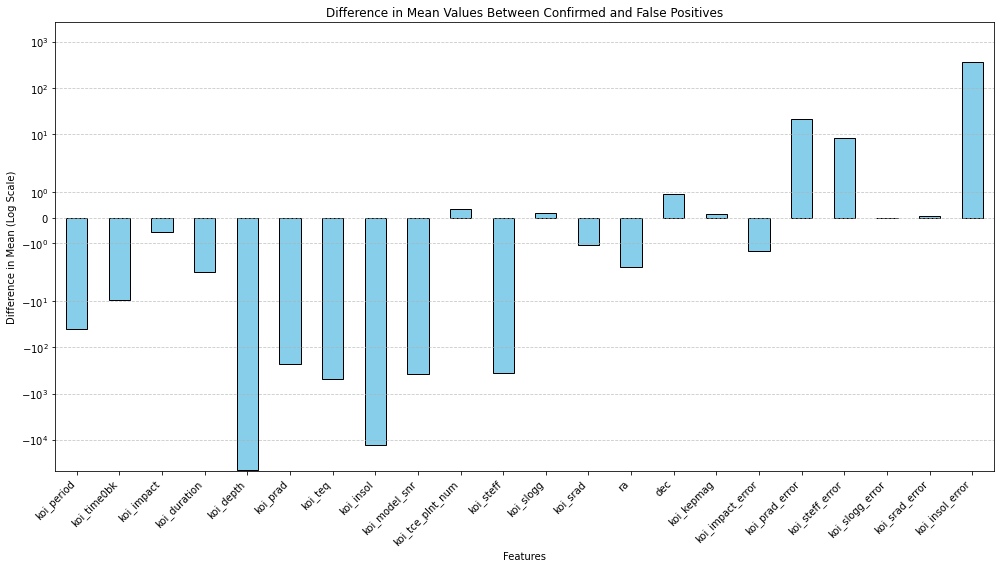

In [13]:
import matplotlib.pyplot as plt

# Plot the differences in mean values between confirmed and false positive planets with log scale
plt.figure(figsize=(14, 8))
difference.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Difference in Mean Values Between Confirmed and False Positives')
plt.xlabel('Features')
plt.ylabel('Difference in Mean (Log Scale)')
plt.xticks(rotation=45, ha='right')  # Set x-axis labels to be diagonal for better readability
plt.yscale('symlog')  # Apply symmetric log scale to the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We applied a logarithmic scale to the Y-axis to better visualize the differences between the variables without having one of them, like koi_depth, dominate the chart. With this scale, we can better see differences in variables like koi_period and others that were previously lost due to the large scale of some variables. We can observe that some variables, such as koi_period, koi_depth, koi_prad, and koi_model_snr, show significant differences between confirmed planets and false positives. This suggests that these features could play an important role in classifying exoplanet candidates. Variables with large differences indicate that they are crucial in determining whether a candidate is confirmed or a false positive. For example, a lower value of koi_model_snr in confirmed planets might suggest clearer and less noisy signals.

### 3) Feature Selection Techniques

In this section, we will use three different feature selection techniques to reduce the number of features in our dataset while minimizing the impact on predictive performance:

1. **Correlation Analysis**: We will eliminate features that are highly correlated with each other (correlation > 0.85), as these features provide redundant information.

2. **Feature Importance using RandomForest**: We will train a RandomForestClassifier to determine the importance of each feature and select the top 50% of features that contribute the most to prediction.

3. **Principal Component Analysis (PCA)**: We will use PCA to reduce the dimensionality of our dataset by projecting the features onto principal components that retain the most variance in the data.

After applying these three methods, we will compare the selected features from each technique to determine the best approach for reducing the feature space.


1. **Correlation Analysis**

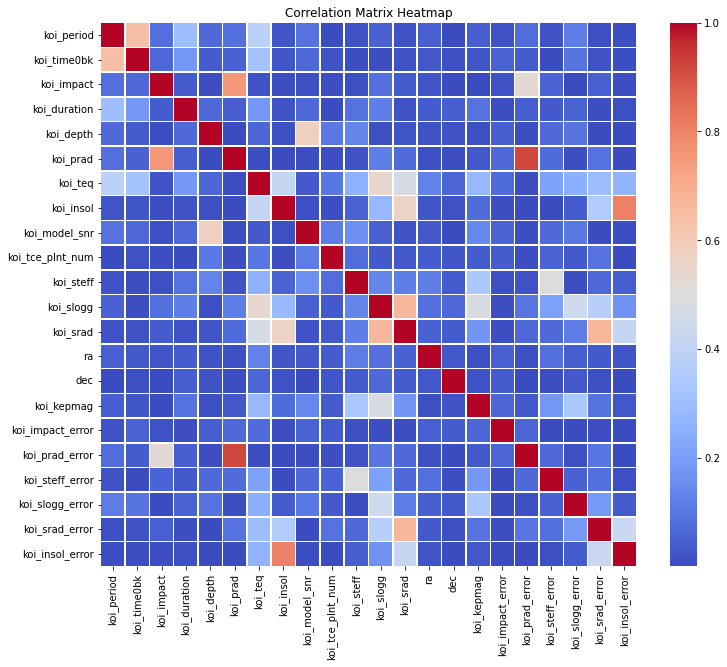

Features removed due to high correlation:
['koi_prad_error']
Features retained after correlation analysis:
Index(['koi_disposition', 'koi_period', 'koi_time0bk', 'koi_impact',
       'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_slogg',
       'koi_srad', 'ra', 'dec', 'koi_kepmag', 'koi_impact_error',
       'koi_steff_error', 'koi_slogg_error', 'koi_srad_error',
       'koi_insol_error'],
      dtype='object')


22

In [14]:
import seaborn as sns


# Calculate the correlation matrix
correlation_matrix = filtered_df.corr().abs()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Select the upper triangle of the correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.85
high_correlation_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.85)]

# Drop features with high correlation
reduced_df_correlation = filtered_df.drop(columns=high_correlation_features)

print("Features removed due to high correlation:")
print(high_correlation_features)
print("Features retained after correlation analysis:")
print(reduced_df_correlation.columns)
len(reduced_df_correlation.columns)


2. **Feature Importance using RandomForest**

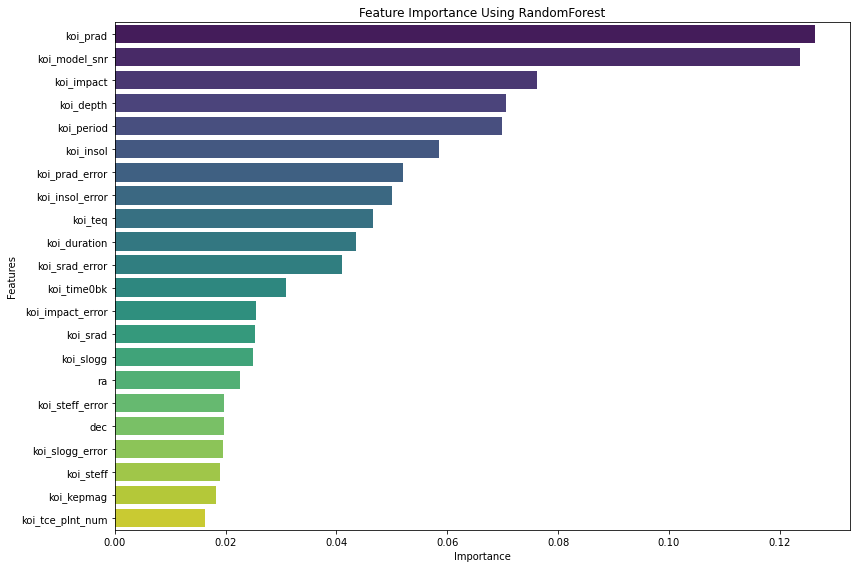

Features selected using RandomForest:
5            koi_prad
8       koi_model_snr
2          koi_impact
4           koi_depth
0          koi_period
7           koi_insol
17     koi_prad_error
21    koi_insol_error
6             koi_teq
3        koi_duration
20     koi_srad_error
Name: Feature, dtype: object


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Prepare the data for training
X = filtered_df.drop(columns=['koi_disposition'])
y = filtered_df['koi_disposition']

# Convert the target variable into binary: CONFIRMED = 1, FALSE POSITIVE = 0, CANDIDATE = 2
y = y.map({'CONFIRMED': 1, 'FALSE POSITIVE': 0, 'CANDIDATE': 2}).dropna()

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a RandomForest model to determine feature importance
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance and select the top 50% of features
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_features_rf = feature_importance_df.head(len(feature_importance_df) // 2)['Feature']

# Create a new DataFrame with the selected top features
reduced_df_rf = filtered_df[top_features_rf]

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance Using RandomForest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

print("Features selected using RandomForest:")
print(top_features_rf)


3. **Principal Component Analysis (PCA)**

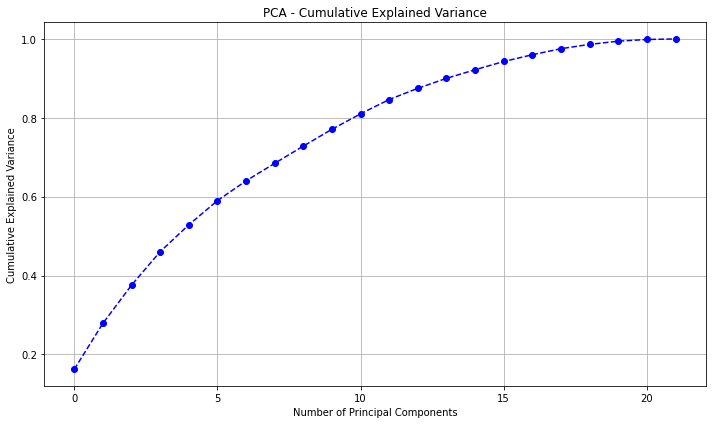

PCA components representing the most variance:
['PCA_Component_1', 'PCA_Component_2', 'PCA_Component_3', 'PCA_Component_4', 'PCA_Component_5', 'PCA_Component_6', 'PCA_Component_7', 'PCA_Component_8', 'PCA_Component_9', 'PCA_Component_10', 'PCA_Component_11', 'PCA_Component_12', 'PCA_Component_13', 'PCA_Component_14', 'PCA_Component_15', 'PCA_Component_16', 'PCA_Component_17', 'PCA_Component_18', 'PCA_Component_19', 'PCA_Component_20', 'PCA_Component_21', 'PCA_Component_22']


In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 50% of the original number of features
pca = PCA(n_components=len(X.columns))
X_pca = pca.fit_transform(X_scaled)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid()
plt.tight_layout()
plt.show()

# Get the components that contribute most to the variance
pca_features = [f'PCA_Component_{i+1}' for i in range(pca.n_components_)]
print("PCA components representing the most variance:")
print(pca_features)


PCA Loadings:
                  koi_period  koi_time0bk  koi_impact  koi_duration  \
PCA_Component_1    -0.072465    -0.082781    0.068273     -0.000477   
PCA_Component_2     0.234048     0.197374    0.486295      0.125233   
PCA_Component_3     0.169010     0.174622   -0.043028     -0.039861   
PCA_Component_4    -0.547343    -0.505062    0.164032     -0.386932   
PCA_Component_5     0.038931     0.064035    0.016834      0.093127   
PCA_Component_6     0.013259     0.027780    0.029441     -0.129608   
PCA_Component_7    -0.042996     0.001669    0.070411      0.084064   
PCA_Component_8    -0.039961    -0.015449    0.023603      0.048560   
PCA_Component_9    -0.081680    -0.078444   -0.008247      0.168313   
PCA_Component_10   -0.053708     0.025009    0.062870     -0.232763   
PCA_Component_11    0.093323     0.164903   -0.092571     -0.353434   
PCA_Component_12   -0.158727    -0.383125   -0.058370      0.727233   
PCA_Component_13    0.020393    -0.081849    0.028773      0.00

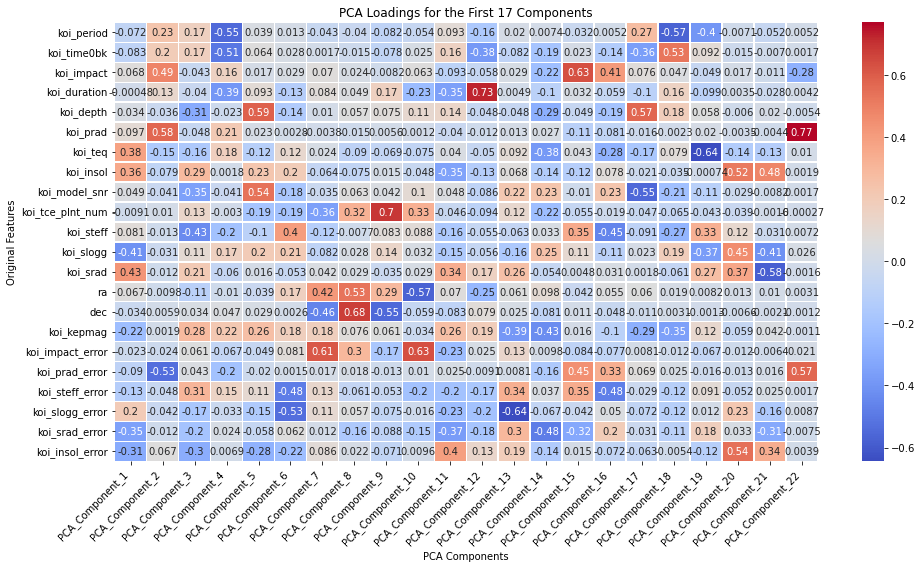

In [17]:
# Get the PCA components and loadings
pca_loadings = pd.DataFrame(pca.components_, columns=X.columns, index=pca_features)

# Display the loadings to see which features contribute the most to each component
print("PCA Loadings:")
print(pca_loadings)

# Plot the loadings of the first few components
plt.figure(figsize=(14, 8))
sns.heatmap(pca_loadings.T, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('PCA Loadings for the First 17 Components')
plt.xlabel('PCA Components')
plt.ylabel('Original Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [18]:
# Calculate the sum of absolute loadings for the first 17 components
top_features_contributions = pca_loadings.iloc[:17].abs().sum().sort_values(ascending=False)
print(top_features_contributions)

# Select the top features that contribute the most
num_top_features = len(X.columns) // 2  # Select half of the original features as a reduced set
top_features_pca = top_features_contributions.head(num_top_features).index

print("Top features selected based on PCA contributions:")
print(top_features_pca)




koi_steff_error     3.265260
koi_kepmag          3.197844
koi_srad_error      2.987050
koi_tce_plnt_num    2.842944
ra                  2.842267
koi_model_snr       2.820727
koi_steff           2.735277
koi_depth           2.732373
koi_duration        2.690548
koi_slogg_error     2.678561
koi_impact_error    2.580777
koi_time0bk         2.514812
koi_impact          2.488032
koi_teq             2.424087
koi_insol_error     2.387974
koi_insol           2.260675
koi_slogg           2.255645
dec                 2.233133
koi_prad_error      1.991463
koi_period          1.883914
koi_srad            1.768528
koi_prad            1.279444
dtype: float64
Top features selected based on PCA contributions:
Index(['koi_steff_error', 'koi_kepmag', 'koi_srad_error', 'koi_tce_plnt_num',
       'ra', 'koi_model_snr', 'koi_steff', 'koi_depth', 'koi_duration',
       'koi_slogg_error', 'koi_impact_error'],
      dtype='object')


#### Feature Selection Strategy
We decided to use features selected by RandomForest. The Correlation Analysis retained almost all original features, making it ineffective for reducing redundancy. On the other hand, RandomForest identified the most impactful features for prediction, balancing simplicity and accuracy.

PCA was excluded because it primarily selected measurement uncertainties (err1, err2) (and leaving out important physical features), which do not directly describe the exoplanet's physical properties. Instead, we prioritized features that provide interpretable, relevant information for predicting exoplanet candidates.

In [19]:
# Define the initial set of features as all columns except the target ('koi_disposition')
initial_features = filtered_df.columns.drop('koi_disposition')

# Create a DataFrame with all initial features (before any feature reduction)
df_initial_features = filtered_df[initial_features]

# Define the final features selected by RandomForest
final_features_rf = ['koi_prad', 'koi_model_snr', 'koi_impact', 'koi_depth', 'koi_period',
                     'koi_insol', 'koi_teq', 'koi_duration']

# Create the reduced DataFrame with the final selected features
df_final_features = filtered_df[final_features_rf]

print("Initial features before feature selection:")
print(list(initial_features))

print("Final selected features after feature selection by RandomForest:")
print(final_features_rf)


Initial features before feature selection:
['koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_slogg', 'koi_srad', 'ra', 'dec', 'koi_kepmag', 'koi_impact_error', 'koi_prad_error', 'koi_steff_error', 'koi_slogg_error', 'koi_srad_error', 'koi_insol_error']
Final selected features after feature selection by RandomForest:
['koi_prad', 'koi_model_snr', 'koi_impact', 'koi_depth', 'koi_period', 'koi_insol', 'koi_teq', 'koi_duration']


In [20]:
len(initial_features),len(final_features_rf)

(22, 8)

### 4) Encoding and Standardization


In this step, we will identify the types of variables in the dataset and apply transformations where necessary. Specifically, we will:

1. **Identify Variable Types**: Determine if we have categorical or numerical variables.
2. **Encoding**: Apply **One-Hot Encoding** to categorical features to convert them into numerical representations suitable for machine learning models.
3. **Standardization**: Standardize numerical features using **Z-score normalization** to bring them to a similar scale, which helps models perform better by preventing features with larger ranges from dominating.

In [21]:
# Here we select the features that we are going to use for modeling
filtered_df = filtered_df[final_features_rf + ['koi_disposition']] 
filtered_df



,koi_prad,koi_model_snr,koi_impact,koi_depth,koi_period,koi_insol,koi_teq,koi_duration,koi_disposition
0,2.83,25.8,0.586,874.8,54.418383,9.11,443,4.50700,CONFIRMED
1,14.60,76.3,0.969,10829.0,19.899140,39.30,638,1.78220,FALSE POSITIVE
2,33.46,505.6,1.276,8079.2,1.736952,891.96,1395,2.40641,FALSE POSITIVE
3,2.75,40.9,0.701,603.3,2.525592,926.16,1406,1.65450,CONFIRMED
4,2.77,40.2,0.762,686.0,4.134435,427.65,1160,3.14020,CONFIRMED
...,...,...,...,...,...,...,...,...,...
6983,534.47,171.5,2.441,1583.8,21.513523,242.54,1006,77.98300,FALSE POSITIVE
6986,1.11,8.4,0.765,87.7,8.589871,176.40,929,4.80600,FALSE POSITIVE
6987,29.35,453.3,1.252,1579.2,0.527699,4500.53,2088,3.22210,FALSE POSITIVE
6989,1.07,12.3,0.147,103.6,0.681402,5713.41,2218,0.86500,FALSE POSITIVE


In [22]:
# Step 1: Identify the types of variables in the dataset
print(filtered_df.dtypes)

# Step 2: Identify categorical and numerical features
categorical_features = filtered_df.select_dtypes(include=['object']).columns
numerical_features = filtered_df.select_dtypes(include=['float64', 'int64']).columns

print("Categorical features:", categorical_features)
print("Numerical features:", numerical_features)

# Step 3: Apply One-Hot Encoding to categorical variables (if any)
# Check the original counts of 'CONFIRMED' and 'FALSE POSITIVE'
print("Original counts of 'CONFIRMED' and 'FALSE POSITIVE':")
print(filtered_df['koi_disposition'].value_counts())
if len(categorical_features) > 0:
    filtered_df = pd.get_dummies(filtered_df, columns=categorical_features, drop_first=False)
    if 'koi_disposition_CONFIRMED' in filtered_df.columns:
        filtered_df['koi_disposition'] = filtered_df['koi_disposition_CONFIRMED']
        filtered_df = filtered_df.drop(columns=['koi_disposition_FALSE POSITIVE', 'koi_disposition_CONFIRMED'])
    print("Applied One-Hot Encoding to categorical variables. 'koi_disposition' column: 1 for CONFIRMED, 0 for FALSE POSITIVE.")
else:
    print("No categorical variables found for encoding.")

# Step 3.1: Verify encoding of 'koi_disposition' column
print(filtered_df['koi_disposition'].value_counts())

# Step 4: Standardize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
filtered_df[numerical_features] = scaler.fit_transform(filtered_df[numerical_features])
print("Standardized numerical features.")

# Display the first few rows of the updated DataFrame
filtered_df.head()

koi_prad           float64
koi_model_snr      float64
koi_impact         float64
koi_depth          float64
koi_period         float64
koi_insol          float64
koi_teq              int64
koi_duration       float64
koi_disposition     object
dtype: object
Categorical features: Index(['koi_disposition'], dtype='object')
Numerical features: Index(['koi_prad', 'koi_model_snr', 'koi_impact', 'koi_depth', 'koi_period',
       'koi_insol', 'koi_teq', 'koi_duration'],
      dtype='object')
Original counts of 'CONFIRMED' and 'FALSE POSITIVE':
FALSE POSITIVE    3504
CONFIRMED         1800
Name: koi_disposition, dtype: int64
Applied One-Hot Encoding to categorical variables. 'koi_disposition' column: 1 for CONFIRMED, 0 for FALSE POSITIVE.
0    3504
1    1800
Name: koi_disposition, dtype: int64
Standardized numerical features.


,koi_prad,koi_model_snr,koi_impact,koi_depth,koi_period,koi_insol,koi_teq,koi_duration,koi_disposition
0,-0.038040,-0.349136,-0.057734,-0.322299,0.015282,-0.050314,-0.800734,-0.186099,1
1,-0.035125,-0.294724,0.044896,-0.215628,-0.282446,-0.050144,-0.583865,-0.577335,0
2,-0.030456,0.167832,0.127161,-0.245095,-0.439095,-0.045346,0.258033,-0.487709,0
3,-0.038059,-0.332867,-0.026918,-0.325208,-0.432293,-0.045154,0.270267,-0.595670,1
4,-0.038054,-0.333621,-0.010573,-0.324322,-0.418417,-0.047959,-0.003322,-0.382349,1


# Model Training, Optimization and Evaluation



In [28]:
# Reminder of the structure of our DataFrame
filtered_df

,koi_prad,koi_model_snr,koi_impact,koi_depth,koi_period,koi_insol,koi_teq,koi_duration,koi_disposition
0,-0.038040,-0.349136,-0.057734,-0.322299,0.015282,-0.050314,-0.800734,-0.186099,1
1,-0.035125,-0.294724,0.044896,-0.215628,-0.282446,-0.050144,-0.583865,-0.577335,0
2,-0.030456,0.167832,0.127161,-0.245095,-0.439095,-0.045346,0.258033,-0.487709,0
3,-0.038059,-0.332867,-0.026918,-0.325208,-0.432293,-0.045154,0.270267,-0.595670,1
4,-0.038054,-0.333621,-0.010573,-0.324322,-0.418417,-0.047959,-0.003322,-0.382349,1
...,...,...,...,...,...,...,...,...,...
6983,0.093585,-0.192150,0.439339,-0.314701,-0.268522,-0.049000,-0.174593,10.363832,0
6986,-0.038465,-0.367884,-0.009769,-0.330733,-0.379989,-0.049373,-0.260229,-0.143168,0
6987,-0.031474,0.111480,0.120730,-0.314750,-0.449525,-0.025041,1.028753,-0.370589,0
6989,-0.038475,-0.363682,-0.175370,-0.330563,-0.448199,-0.018217,1.173333,-0.709030,0


Training and testing sets created.
Accuracy Score: 0.8982092365692743
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       718
           1       0.85      0.84      0.84       343

    accuracy                           0.90      1061
   macro avg       0.88      0.88      0.88      1061
weighted avg       0.90      0.90      0.90      1061



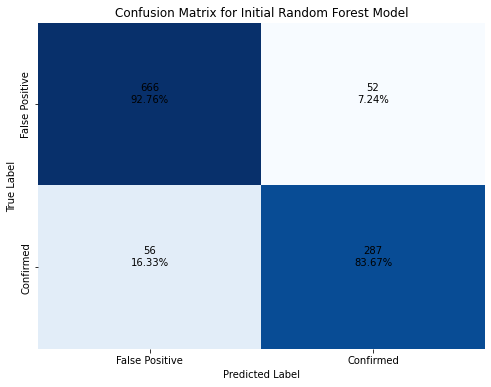

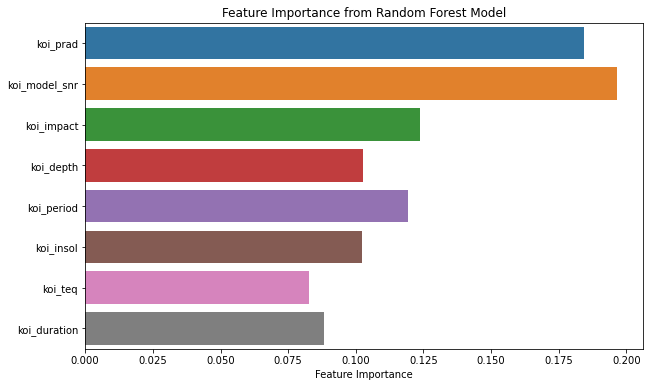

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Optimized Accuracy Score: 0.9019792648444863
Optimized Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       718
           1       0.85      0.85      0.85       343

    accuracy                           0.90      1061
   macro avg       0.89      0.89      0.89      1061
weighted avg       0.90      0.90      0.90      1061



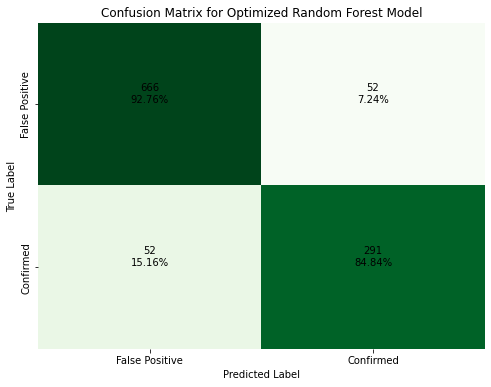

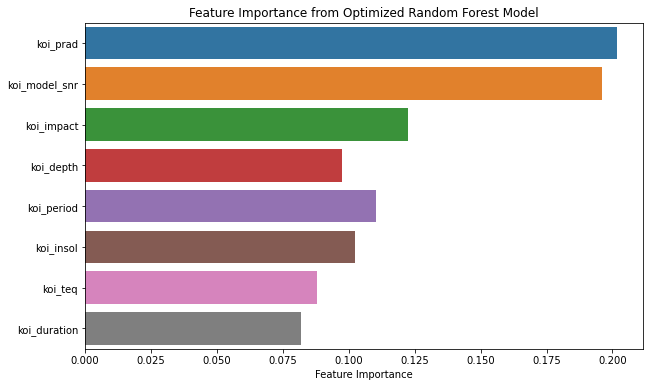

In [24]:


# Step 1: Split the Data into Training and Testing Sets

"""
### Train-Test Split

In this step, we will split the dataset into training and testing sets to evaluate model performance. 
This is essential for determining the generalizability of our machine learning model.
"""

from sklearn.model_selection import train_test_split

# Define features and target
X = filtered_df.drop(columns=['koi_disposition'])
y = filtered_df['koi_disposition']

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and testing sets created.")

# Step 2: Train a Machine Learning Model

"""
### Model Training

We will train a Random Forest Classifier as our machine learning model of choice. 
This model is suitable for binary classification problems like ours and has shown to be effective in similar tasks.
"""

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix / conf_matrix.sum(axis=1, keepdims=True) * 100
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percent, annot=False, fmt=".2f", cmap="Blues", cbar=False, xticklabels=['False Positive', 'Confirmed'], yticklabels=['False Positive', 'Confirmed'])
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}\n{conf_matrix_percent[i, j]:.2f}%", ha="center", va="bottom", color="black")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Initial Random Forest Model')
plt.show()

# Feature Importance Plot
feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, orient='h')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest Model')
plt.show()

# Step 3: Hyperparameter Optimization

"""
### Hyperparameter Optimization

Next, we will optimize the hyperparameters of our Random Forest model using Grid Search. 
This will help us find the best combination of hyperparameters to improve model performance.
"""

from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearch to the data
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

# Step 4: Retrain the Model with Best Hyperparameters

"""
### Retraining with Optimized Hyperparameters

Using the best hyperparameters found through Grid Search, we will retrain the model 
and compare its performance with the initial model.
"""

# Retrain the model with the best parameters
best_rf_model = grid_search.best_estimator_

# Fit the model
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_optimized = best_rf_model.predict(X_test)

# Evaluate the optimized model
print("Optimized Accuracy Score:", accuracy_score(y_test, y_pred_optimized))
print("Optimized Classification Report:\n", classification_report(y_test, y_pred_optimized))

# Plot the confusion matrix for the optimized model
conf_matrix_optimized = confusion_matrix(y_test, y_pred_optimized)
conf_matrix_optimized_percent = conf_matrix_optimized / conf_matrix_optimized.sum(axis=1, keepdims=True) * 100
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_optimized_percent, annot=False, fmt=".2f", cmap="Greens", cbar=False, xticklabels=['False Positive', 'Confirmed'], yticklabels=['False Positive', 'Confirmed'])
for i in range(conf_matrix_optimized.shape[0]):
    for j in range(conf_matrix_optimized.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix_optimized[i, j]}\n{conf_matrix_optimized_percent[i, j]:.2f}%", ha="center", va="bottom", color="black")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Optimized Random Forest Model')
plt.show()

# Feature Importance Plot for Optimized Model
feature_importances_optimized = best_rf_model.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_optimized, y=features, orient='h')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Optimized Random Forest Model')
plt.show()

Using the reduced feature set (8 features) yields 90% accuracy, while using all 22 features improves accuracy by just 1% (91%). The small gain doesn't justify the added complexity, risk of overfitting, or increased training time. Thus, the simpler model with fewer features is more efficient while maintaining strong performance.

To evaluate the reliability of our model in confirming an exoplanet, we focus on precision for the "Confirmed" class. The precision value of 0.85 means that 85% of the candidates predicted as confirmed by our model are actually confirmed exoplanets. Therefore, while our model performs well, there is still a 15% chance that a candidate predicted as a confirmed planet might be a false positive.

#### Additional Models


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Hyperparameters for SVM: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVM Accuracy Score: 0.8652214891611687
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       718
           1       0.77      0.84      0.80       343

    accuracy                           0.87      1061
   macro avg       0.84      0.86      0.85      1061
weighted avg       0.87      0.87      0.87      1061



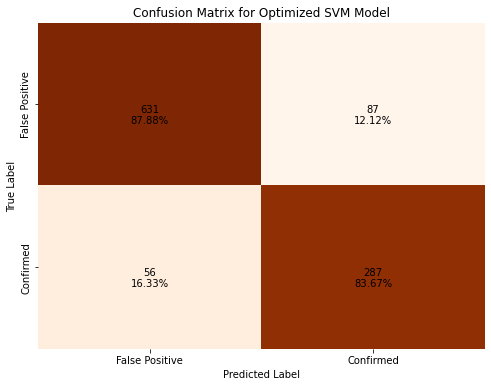

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Hyperparameters for GBC: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}
Gradient Boosting Accuracy Score: 0.9048067860508954
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       718
           1       0.84      0.87      0.86       343

    accuracy                           0.90      1061
   macro avg       0.89      0.90      0.89      1061
weighted avg       0.91      0.90      0.91      1061



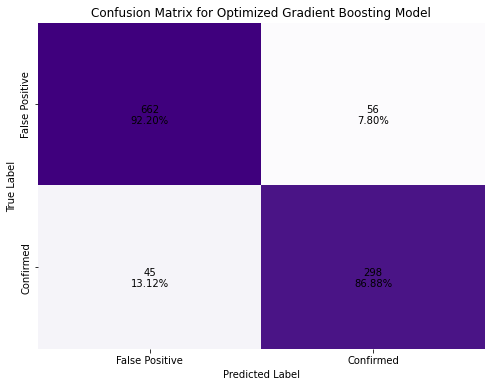

In [27]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Step 1: Train a Support Vector Machine Model with Hyperparameter Optimization
"""
### SVM Model Training with Hyperparameter Optimization

We will train a Support Vector Machine (SVM) with a radial basis function (RBF) kernel.
We will use Grid Search to optimize the hyperparameters.
"""

svm_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf']
}

svm_grid_search = GridSearchCV(estimator=SVC(probability=True, random_state=42), param_grid=svm_param_grid, cv=3, n_jobs=-1, verbose=2)
svm_grid_search.fit(X_train, y_train)

best_svm_model = svm_grid_search.best_estimator_

# Make predictions and evaluate the SVM model
y_pred_svm = best_svm_model.predict(X_test)

print("Best Hyperparameters for SVM:", svm_grid_search.best_params_)
print("SVM Accuracy Score:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# Plot the confusion matrix for SVM model
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
conf_matrix_svm_percent = conf_matrix_svm / conf_matrix_svm.sum(axis=1, keepdims=True) * 100
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm_percent, annot=False, fmt=".2f", cmap="Oranges", cbar=False, xticklabels=['False Positive', 'Confirmed'], yticklabels=['False Positive', 'Confirmed'])
for i in range(conf_matrix_svm.shape[0]):
    for j in range(conf_matrix_svm.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix_svm[i, j]}\n{conf_matrix_svm_percent[i, j]:.2f}%", ha="center", va="top", color="black")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Optimized SVM Model')
plt.show()

# Step 2: Train a Gradient Boosting Classifier Model with Hyperparameter Optimization
"""
### Gradient Boosting Classifier Training with Hyperparameter Optimization

We will train a Gradient Boosting Classifier using Grid Search to find the best hyperparameters.
"""

gbc_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

gbc_grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_grid=gbc_param_grid, cv=3, n_jobs=-1, verbose=2)
gbc_grid_search.fit(X_train, y_train)

best_gbc_model = gbc_grid_search.best_estimator_

# Make predictions and evaluate the Gradient Boosting model
y_pred_gbc = best_gbc_model.predict(X_test)

print("Best Hyperparameters for GBC:", gbc_grid_search.best_params_)
print("Gradient Boosting Accuracy Score:", accuracy_score(y_test, y_pred_gbc))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gbc))

# Plot the confusion matrix for the Gradient Boosting model
conf_matrix_gbc = confusion_matrix(y_test, y_pred_gbc)
conf_matrix_gbc_percent = conf_matrix_gbc / conf_matrix_gbc.sum(axis=1, keepdims=True) * 100
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gbc_percent, annot=False, fmt=".2f", cmap="Purples", cbar=False, xticklabels=['False Positive', 'Confirmed'], yticklabels=['False Positive', 'Confirmed'])
for i in range(conf_matrix_gbc.shape[0]):
    for j in range(conf_matrix_gbc.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix_gbc[i, j]}\n{conf_matrix_gbc_percent[i, j]:.2f}%", ha="center", va="top", color="black")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Optimized Gradient Boosting Model')
plt.show()




 Disclaimer:
 This code has been assisted by ChatGPT to help structure comments, improve code readability, 
 and verify English grammar. All modifications and final decisions were made by the user.
